In [4]:
import tensorflow as tf

In [2]:
# !pip install tensorflow_datasets
import tensorflow_datasets as tfds
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 

### Only if you have a GPU

In [5]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [6]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
## Please ignore if not training on GPU #####
## this is important for running CuDNN on GPU ##
# check if GPU can be seen by TF

#tf.debugging.set_log_device_placement(True)

gpus = tf.config.experimental.list_physical_devices('GPU')

# Restrict TensorFlow to only use the first GPU
tf.config.experimental.set_memory_growth(gpus[0], True)
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
logical_gpus = tf.config.experimental.list_logical_devices('GPU')
print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")



1 Physical GPUs, 1 Logical GPU


### End of GPU config section

In [10]:
# see available tfds data sets
len(tfds.list_builders())

213

In [11]:
tfds.list_builders()

['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 '

In [14]:
tfds.builder('imdb_reviews').info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
      title     = {Learning Word

In [16]:
# using TFDS dataset
# note: as_supervised converts dicts to tuples

imdb_train, ds_info = tfds.load(name="imdb_reviews", split="train",with_info=True, as_supervised=True)
imdb_test = tfds.load(name="imdb_reviews", split="test",as_supervised=True)

In [17]:
print(ds_info)

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
      title     = {Learning Word

In [18]:
type(imdb_train)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [21]:
for example, label in imdb_train.take(3):
    print(example.numpy(), '\n', label.numpy())

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it." 
 0
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development

## TOKENIZATION 

In [22]:
# Use the default tokenizer settings
tokenizer = tfds.features.text.Tokenizer()

vocabulary_set = set()

for example, label in imdb_train:
  some_tokens = tokenizer.tokenize(example.numpy())
  vocabulary_set.update(some_tokens)

In [23]:
some_tokens

['First',
 'of',
 'all',
 'Riget',
 'is',
 'wonderful',
 'Good',
 'comedy',
 'and',
 'mystery',
 'thriller',
 'at',
 'the',
 'same',
 'time',
 'Nice',
 'combination',
 'of',
 'strange',
 'dogma',
 'style',
 'of',
 'telling',
 'the',
 'story',
 'together',
 'with',
 'good',
 'music',
 'and',
 'great',
 'actors',
 'But',
 'unfortunately',
 'there',
 's',
 'no',
 'the',
 'end',
 'As',
 'for',
 'me',
 'it',
 's',
 'unacceptable',
 'I',
 'was',
 'thinking',
 'how',
 'it',
 'will',
 'be',
 'possible',
 'to',
 'continue',
 'the',
 'story',
 'without',
 'Helmer',
 'and',
 'Drusse',
 'and',
 'I',
 'have',
 'some',
 'idea',
 'I',
 'think',
 'Lars',
 'should',
 'make',
 'RIGET',
 'III',
 'a',
 'little',
 'bit',
 'different',
 'I',
 'm',
 'sure',
 'that',
 '3rd',
 'part',
 'without',
 'Helmer',
 'wouldn',
 't',
 'be',
 'the',
 'same',
 'So',
 'here',
 's',
 'my',
 'suggestion',
 'Mayble',
 'little',
 'bit',
 'stupid',
 'maybe',
 'not',
 'I',
 'know',
 'that',
 'Lars',
 'likes',
 'to',
 'experiment

In [24]:
# Use the default tokenizer settings
tokenizer = tfds.features.text.Tokenizer()

vocabulary_set = set()
MAX_TOKENS = 0

for example, label in imdb_train:
  some_tokens = tokenizer.tokenize(example.numpy())
  if MAX_TOKENS < len(some_tokens):
      MAX_TOKENS = len(some_tokens)
  vocabulary_set.update(some_tokens)

In [25]:
vocabulary_set

{'perverse',
 'Niellson',
 'Sable',
 'Priscilla',
 'sorely',
 'makeing',
 'Trumillio',
 'immediacy',
 'Geeeee',
 'Tendulkar',
 'Britishness',
 'Pochath',
 'kingship',
 'ADHD',
 'thespic',
 'Stoned',
 'Marvin',
 'Blending',
 'Indie',
 'Adolph',
 'spoilers',
 'invidious',
 'pearls',
 'Slow',
 'overheating',
 'whisks',
 'Honore',
 'wrackingly',
 'drums',
 'Gracen',
 'Anyhow',
 'singers',
 'narcissistic',
 'feebly',
 'handle',
 'analogical',
 'exploiting',
 'roadmovie',
 'missionaries',
 'Balthazar',
 'Dullea',
 'phenomenons',
 'excursionists',
 '1923',
 'Ilyena',
 'mortars',
 'Cornelius',
 'strived',
 'devilment',
 'moss',
 'relocating',
 'obsessions',
 'Maoist',
 'apologists',
 'Rushton',
 'Abbas',
 'Inom',
 'specialised',
 'invocations',
 'powered',
 'reanimates',
 'volts',
 'bigscreen',
 'MYSTERIOUS',
 'buffalo',
 'FALL',
 'dedicate',
 'derangement',
 'Arvidson',
 'Solett',
 'Poker',
 'foretaste',
 'futureworld',
 'Karen',
 'loosly',
 'METAMORPHSIS',
 'BOGART',
 'fined',
 'shrift',
 'w

In [26]:
type(vocabulary_set)

set

In [27]:
len(vocabulary_set)

93929

In [28]:
MAX_TOKENS

2525

## Text Encoding 

In [29]:
encoder = tfds.features.text.TokenTextEncoder(vocabulary_set,tokenizer=tokenizer)

In [30]:
sample_string = 'Hello Dear How are you .'

encoded_string = encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: "{}"'.format(original_string))

Encoded string is [85946, 35876, 40632, 3122, 77194]
The original string: "Hello Dear How are you"


In [31]:
imdb_encoder = tfds.features.text.TokenTextEncoder(vocabulary_set,tokenizer=tokenizer)
vocab_size = imdb_encoder.vocab_size

print(vocab_size, MAX_TOKENS)

93931 2525


In [32]:
# Lets verify tokenization and encoding works
for example, label in imdb_train.take(1):
    print(example)
    encoded = imdb_encoder.encode(example.numpy())

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)


In [33]:
type(encoded)

list

In [34]:
encoded

[66043,
 62260,
 62316,
 36041,
 69980,
 2538,
 64940,
 37394,
 79870,
 29709,
 87957,
 6679,
 11385,
 29168,
 50016,
 63233,
 91039,
 18586,
 3122,
 26757,
 74310,
 17431,
 18387,
 62626,
 38488,
 79870,
 91461,
 78488,
 3331,
 87957,
 12453,
 14910,
 91461,
 26757,
 31276,
 77873,
 49772,
 11951,
 18387,
 2538,
 16969,
 55504,
 61499,
 66043,
 2538,
 84572,
 62316,
 90693,
 81097,
 306,
 70735,
 55325,
 67075,
 58615,
 51956,
 85150,
 73432,
 90184,
 18594,
 64651,
 78157,
 4361,
 73432,
 88712,
 91461,
 39154,
 47948,
 34228,
 28814,
 23655,
 25576,
 12651,
 25808,
 91533,
 67039,
 66965,
 80630,
 69518,
 34942,
 29168,
 62260,
 77636,
 17431,
 3763,
 51956,
 66848,
 42367,
 87957,
 3763,
 2538,
 1604,
 62260,
 76536,
 57916,
 42954,
 38085,
 37051,
 28121,
 36337,
 35950,
 1604,
 41457,
 3122,
 14793,
 55704,
 18387,
 2449,
 48427,
 16969,
 55704,
 11385,
 29168,
 16969,
 24779,
 10403,
 28121,
 77873,
 82374,
 77504,
 60317,
 70891]

In [35]:
# Lets verify tokenization and encoding works
print(imdb_encoder.decode(encoded))

This was an absolutely terrible movie Don t be lured in by Christopher Walken or Michael Ironside Both are great actors but this must simply be their worst role in history Even their great acting could not redeem this movie s ridiculous storyline This movie is an early nineties US propaganda piece The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions Maria Conchita Alonso appeared phony and her pseudo love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning I am disappointed that there are movies like this ruining actor s like Christopher Walken s good name I could barely sit through it


In [36]:
# Lets verify tokenization and encoding works
for example, label in imdb_train.take(1):
    print(example)
    
    encoded = imdb_encoder.encode(example.numpy())
    #print(imdb_encoder.decode(encoded))

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)


# transformation ==> Padding 

In [38]:
# transformation fucntions to be used with the dataset
from tensorflow.keras.preprocessing import sequence

def encode_pad_transform(sample):
    encoded = imdb_encoder.encode(sample.numpy())
    pad = sequence.pad_sequences([encoded], padding='post',maxlen=150)
    return np.array(pad[0], dtype=np.int64)  

def encode_tf_fn(sample, label):
    encoded = tf.py_function(encode_pad_transform,inp=[sample],Tout=(tf.int64))
    encoded.set_shape([None])
    label.set_shape([])
    return encoded, label

In [39]:
# test the transformation on a small subset
subset = imdb_train.take(10)
tst = subset.map(encode_tf_fn)

In [41]:
type(tst)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [42]:
tst

<MapDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>

In [43]:
for review, label in tst.take(1):
    print(review,"\n",label)
    print(imdb_encoder.decode(review))

tf.Tensor(
[66043 62260 62316 36041 69980  2538 64940 37394 79870 29709 87957  6679
 11385 29168 50016 63233 91039 18586  3122 26757 74310 17431 18387 62626
 38488 79870 91461 78488  3331 87957 12453 14910 91461 26757 31276 77873
 49772 11951 18387  2538 16969 55504 61499 66043  2538 84572 62316 90693
 81097   306 70735 55325 67075 58615 51956 85150 73432 90184 18594 64651
 78157  4361 73432 88712 91461 39154 47948 34228 28814 23655 25576 12651
 25808 91533 67039 66965 80630 69518 34942 29168 62260 77636 17431  3763
 51956 66848 42367 87957  3763  2538  1604 62260 76536 57916 42954 38085
 37051 28121 36337 35950  1604 41457  3122 14793 55704 18387  2449 48427
 16969 55704 11385 29168 16969 24779 10403 28121 77873 82374 77504 60317
 70891     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0], shape=(150,), dtype=int64) 
 tf.Tensor(0, shape=(), dtype=int64)
This was 

In [44]:
#now tokenize/encode/pad all training
# and testing data
encoded_train = imdb_train.map(encode_tf_fn,num_parallel_calls=tf.data.experimental.AUTOTUNE)
encoded_test = imdb_test.map(encode_tf_fn,num_parallel_calls=tf.data.experimental.AUTOTUNE)

## Preparing the model

In [47]:
# Length of the vocabulary in chars
vocab_size = imdb_encoder.vocab_size # len(chars)

# The embedding dimension
embedding_dim = 64

# Number of RNN units , Positive integer, dimensionality of the output space.
rnn_units = 64

#batch size
BATCH_SIZE=100

In [48]:
def build_model_lstm(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, mask_zero=True,batch_input_shape=[batch_size, None]),
    tf.keras.layers.LSTM(rnn_units),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  return model


In [49]:
model = build_model_lstm(vocab_size = vocab_size, embedding_dim=embedding_dim,
                          rnn_units=rnn_units,batch_size=BATCH_SIZE)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (100, None, 64)           6011584   
_________________________________________________________________
lstm (LSTM)                  (100, 64)                 33024     
_________________________________________________________________
dense (Dense)                (100, 1)                  65        
Total params: 6,044,673
Trainable params: 6,044,673
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.save('model.h5')

In [51]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy', 'Precision', 'Recall'])

## Model Training and Evaluation

In [52]:
# Prefetch for performance
encoded_train_batched = encoded_train.batch(BATCH_SIZE).prefetch(100)

In [53]:
model.fit(encoded_train.batch(BATCH_SIZE), epochs=10)

Epoch 1/10
250/250 [==============================] - 16s 64ms/step - loss: 0.4105 - accuracy: 0.8043 - precision: 0.7858 - recall: 0.8368
Epoch 2/10
250/250 [==============================] - 16s 65ms/step - loss: 0.1678 - accuracy: 0.9402 - precision: 0.9416 - recall: 0.9386
Epoch 3/10
250/250 [==============================] - 16s 65ms/step - loss: 0.1117 - accuracy: 0.9626 - precision: 0.9637 - recall: 0.9614
Epoch 4/10
250/250 [==============================] - 16s 65ms/step - loss: 0.0932 - accuracy: 0.9669 - precision: 0.9668 - recall: 0.9670
Epoch 5/10
250/250 [==============================] - 16s 64ms/step - loss: 0.0500 - accuracy: 0.9843 - precision: 0.9846 - recall: 0.9841
Epoch 6/10
250/250 [==============================] - 16s 64ms/step - loss: 0.0388 - accuracy: 0.9884 - precision: 0.9892 - recall: 0.9877
Epoch 7/10
250/250 [==============================] - 16s 64ms/step - loss: 0.0330 - accuracy: 0.9893 - precision: 0.9891 - recall: 0.9894
Epoch 8/10
250/250 [=======

In [79]:
history=model.fit(encoded_train.batch(BATCH_SIZE), epochs=10)

Epoch 1/10
250/250 [==============================] - 16s 64ms/step - loss: 0.0111 - accuracy: 0.9966 - precision: 0.9968 - recall: 0.9965
Epoch 2/10
250/250 [==============================] - 16s 63ms/step - loss: 0.0159 - accuracy: 0.9949 - precision: 0.9964 - recall: 0.9934
Epoch 3/10
250/250 [==============================] - 16s 64ms/step - loss: 0.0106 - accuracy: 0.9969 - precision: 0.9965 - recall: 0.9973
Epoch 4/10
250/250 [==============================] - 16s 64ms/step - loss: 0.0031 - accuracy: 0.9992 - precision: 0.9992 - recall: 0.9992
Epoch 5/10
250/250 [==============================] - 16s 63ms/step - loss: 0.0031 - accuracy: 0.9990 - precision: 0.9988 - recall: 0.9992
Epoch 6/10
250/250 [==============================] - 16s 63ms/step - loss: 0.0025 - accuracy: 0.9994 - precision: 0.9994 - recall: 0.9994
Epoch 7/10
250/250 [==============================] - 16s 63ms/step - loss: 0.0023 - accuracy: 0.9995 - precision: 0.9996 - recall: 0.9994
Epoch 8/10
250/250 [=======

In [80]:
results=model.evaluate(encoded_test.batch(BATCH_SIZE))

  2/250 [..............................] - ETA: 9s - loss: 1.7583 - accuracy: 0.8350 - precision: 0.8434 - recall: 0.7778WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0107s vs `on_test_batch_end` time: 0.0283s). Check your callbacks.


250/250 [==============================] - 9s 37ms/step - loss: 1.3166 - accuracy: 0.8338 - precision: 0.8480 - recall: 0.8134: 9s - loss: 1.4541 - accuracy: 0.8270 - pre - ETA: 6s - loss: 1.3713 - accuracy: 0.8316 - precisio - ETA: 5s - loss: 1.3736 - accuracy: 0.8285 - precision: 0.8430 - recall - ETA: 4s - loss: 1.3601 - accuracy: 0.8308 - precision: 0.8440 - recall: 0.8 - ETA: 4s - loss: 1.3509 - accuracy: 0.8316 - precision: 0.8444 - recall - ETA: 4s - loss: 1.3511 - accuracy: 0.8312 - precision: 0.8444 - - ETA: 3s - loss: 1.3469 - accuracy: 0.8316 - precision: 0.8453 - recall: 0.8 - ETA: 2s - loss: 1.3440 - accuracy: 0.8318 - precision:  - ETA: 1s - loss: 1.3240 - accuracy: 0.8332 - precision: 0.8473 -  - ETA: 0s - loss: 1.3226 - accuracy: 0.8330 - precision: 0.8470 - recal


In [72]:
loss = results[0]
accuracy = results[1]
precision= results[2]
recall= results[3]

In [81]:
results

[1.3165918588638306,
 0.8338000178337097,
 0.8480273485183716,
 0.8133599758148193]

In [82]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall'])


In [83]:
history.history

{'loss': [0.01106932945549488,
  0.01585003361105919,
  0.010646194219589233,
  0.003108886070549488,
  0.0030836770310997963,
  0.0025449013337492943,
  0.002274879952892661,
  0.0005521158454939723,
  6.820454291300848e-05,
  2.8925816877745092e-05],
 'accuracy': [0.9966400265693665,
  0.9948800206184387,
  0.9968799948692322,
  0.9991999864578247,
  0.9990000128746033,
  0.9993600249290466,
  0.9995200037956238,
  0.9998800158500671,
  1.0,
  1.0],
 'precision': [0.9967989921569824,
  0.9963890314102173,
  0.996482789516449,
  0.9991999864578247,
  0.9988004565238953,
  0.9993600249290466,
  0.9995999336242676,
  0.9998400211334229,
  1.0,
  1.0],
 'recall': [0.9964799880981445,
  0.9933599829673767,
  0.9972800016403198,
  0.9991999864578247,
  0.9991999864578247,
  0.9993600249290466,
  0.9994400143623352,
  0.9999200105667114,
  1.0,
  1.0]}

In [84]:
test_loss=history.history['loss']

In [85]:
# train_loss = history.history['loss']
# loss_val = history.history['val_loss']


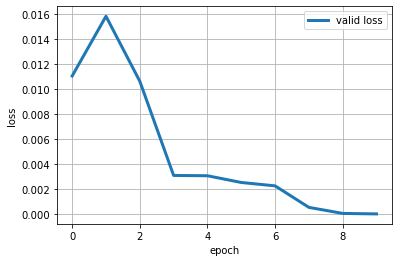

In [88]:
#pyplot.plot(train_loss, linewidth=3,label="train loss")
plt.plot(test_loss, linewidth=3, label="valid loss")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

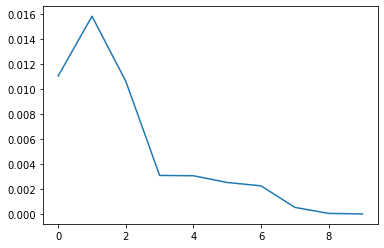

In [87]:
plt.plot(history.history['loss'])

# BiLSTM Model

In [89]:
# Length of the vocabulary in chars
vocab_size = imdb_encoder.vocab_size # len(chars)

# The embedding dimension
embedding_dim = 128

# Number of RNN units
rnn_units = 64

#batch size
BATCH_SIZE=50

In [90]:
dropout=0.2
def build_model_bilstm(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, mask_zero=True,batch_input_shape=[batch_size, None]),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(rnn_units, return_sequences=True, dropout=0.25)),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(rnn_units, dropout=0.25)),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  return model

In [91]:
bilstm = build_model_bilstm(vocab_size = vocab_size,embedding_dim=embedding_dim, rnn_units=rnn_units,batch_size=BATCH_SIZE)
bilstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (50, None, 128)           12023168  
_________________________________________________________________
dropout (Dropout)            (50, None, 128)           0         
_________________________________________________________________
bidirectional (Bidirectional (50, None, 128)           98816     
_________________________________________________________________
dropout_1 (Dropout)          (50, None, 128)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (50, 128)                 98816     
_________________________________________________________________
dropout_2 (Dropout)          (50, 128)                 0         
_________________________________________________________________
dense_1 (Dense)              (50, 1)                  

In [92]:
bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])

In [93]:
encoded_train_batched = encoded_train.batch(BATCH_SIZE).prefetch(100)

In [94]:
bilstm.fit(encoded_train_batched, epochs=5)

Epoch 1/5
500/500 [==============================] - 62s 123ms/step - loss: 0.3784 - accuracy: 0.8242 - precision: 0.8155 - recall: 0.8381
Epoch 2/5
500/500 [==============================] - 61s 123ms/step - loss: 0.1511 - accuracy: 0.9449 - precision: 0.9441 - recall: 0.9458
Epoch 3/5
500/500 [==============================] - 62s 123ms/step - loss: 0.0803 - accuracy: 0.9719 - precision: 0.9718 - recall: 0.9720
Epoch 4/5
500/500 [==============================] - 61s 123ms/step - loss: 0.0432 - accuracy: 0.9848 - precision: 0.9846 - recall: 0.9850
Epoch 5/5
500/500 [==============================] - 62s 123ms/step - loss: 0.0301 - accuracy: 0.9898 - precision: 0.9903 - recall: 0.9893


In [95]:
# without dropput between layers [1.0472896423190832, 0.83548, 0.8025395, 0.88992]
bilstm.evaluate(encoded_test.batch(BATCH_SIZE))

500/500 [==============================] - 11s 21ms/step - loss: 1.0186 - accuracy: 0.8138 - precision: 0.7535 - recall: 0.9330 4s 


[1.0186095237731934,
 0.8138399720191956,
 0.7534565329551697,
 0.9329599738121033]